In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = "../data/with_stock_data.csv"
frame = pd.read_csv(data_path)
frame.columns

Index(['name', 'domain', 'year founded', 'industry', 'size range', 'city',
       ' state', 'country', ' linkedin url', 'current employee estimate',
       'total employee estimate', 'Score', 'reviews', 'salaries', 'interviews',
       'KMT', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe',
       'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue',
       'enterprise_value_ebitda', 'profit_margin', 'operating_margin',
       'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share',
       'quarterly_revenue_share', 'gross_profit', 'ebitda',
       'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth',
       'total_cash', 'total_cash_per_share', 'total_dept',
       'total_dept_per_equity', 'operating_cash_flow',
       'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week',
       'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low'],
      dtype='object')

In [3]:
def convertToClass(Y, k):
    return Y.apply(lambda elem : np.round(elem * k / 5))

# def convertToScore(Y, k):
#     return Y.apply(lambda elem : elem * 5 / k)

# Data Exploration

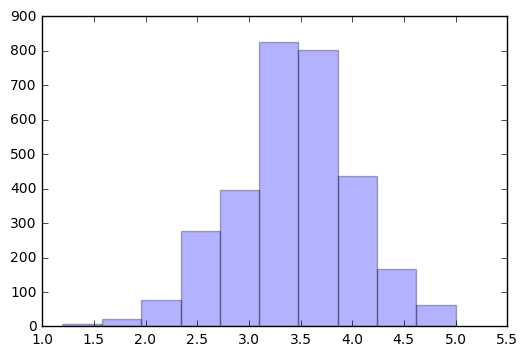

In [4]:
frame['Score']
plt.hist(frame['Score'], alpha=0.3)
plt.show()

# Feature Selection

In [5]:
# Pick Features
# non_categorical_columns = ['year founded', 'current employee estimate', 'total employee estimate', 'reviews', 'salaries', 'interviews', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe', 'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue', 'enterprise_value_ebitda', 'profit_margin', 'operating_margin', 'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share', 'quarterly_revenue_share', 'gross_profit', 'ebitda', 'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth', 'total_cash', 'total_cash_per_share', 'total_dept', 'total_dept_per_equity', 'operating_cash_flow', 'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week', 'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low']
# categorical_columns = ['industry', 'size range', 'city', ' state', 'country']
non_categorical_columns = ['trailing_pe', 'leveraged_free_cash_flow', 'operating_cash_flow', 'total_dept_per_equity', 'ebitda', 'net_income_avi_to_common', 'forward_pe', 'total_cash']
categorical_columns = ['city']

In [6]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

# Linear Regression Random

In [38]:
# Normal CV with RANDOM data
X_random = pd.DataFrame({"rand" : np.random.random(Y.shape[0])})
x_train, x_test, y_train, y_test = train_test_split(X_random, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
error = mean_squared_error(y_test, predictions)
print("Mean Squared Error:")
print(error)

# Training data
# print("Training Accuracy")
# pred = model.predict(X)
# print(sum(np.abs(pred - Y.values) <  0.5)/ Y.shape[0])
# y_pred = convertToClass(pred, 10)
# Y_scaled = convertToClass(Y, 10)
# confusion_m = confusion_matrix(Y_scaled, y_pred)
# print(confusion_m)

Mean Squared Error:
0.3701779820074096


# Linear Regression (L1 Regularization)

In [53]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X, Y)
pred = reg.predict(X)

In [54]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

In [55]:
# Training Data
print("Training Mean Square Error:")
print(mean_squared_error(Y, pred))
print("Training Accuracy")
print(sum(np.abs(pred - Y.values) <  0.25)/ Y.shape[0])
y_pred = convertToClass(pred, 10)
Y_scaled = convertToClass(Y, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Training Mean Square Error:
0.3387970335855975
Training Accuracy
[0.35003253 0.30839297 0.30839297 ... 0.35003253 0.35003253 0.35003253]
[[   0    0    0    0    0    2    0    0    0]
 [   0    0    0    0    0    8    0    0    0]
 [   0    0    0    0    0   67    0    0    0]
 [   0    0    0    0    0  304    0    0    0]
 [   0    0    0    0    2  784    0    1    0]
 [   0    0    0    0    2 1048    1    0    0]
 [   0    0    0    0    0  621    3    1    0]
 [   0    0    0    0    0  190    1    0    0]
 [   0    0    0    0    0   39    0    0    0]]


In [56]:
# Test data: our own train / test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
error = mean_squared_error(y_test, predictions)
print("Test Mean Square Error")
print(error)
print("Test Accuracy")
print(sum(np.abs(predictions - y_test.values) <  0.25)/ y_test.shape[0])
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Test Mean Square Error
0.4015261875810092
Test Accuracy
[0.29918699]
Test Confusion Matrix
[[  0   0   0   0   2   0   0   0]
 [  0   0   0   1   8   2   0   0]
 [  0   0   0  12  45   3   1   0]
 [  0   1   3  29 120  17   0   1]
 [  0   0   3  34 145   9   1   0]
 [  0   0   1  14 108   5   3   0]
 [  0   0   0   7  25   4   0   0]
 [  0   0   0   2   7   2   0   0]]


# Linear Regression (L2 Regularization)

In [57]:
# Modeling
reg = Ridge(alpha=1.0, normalize=True)
reg.fit(X, Y)
pred = reg.predict(X)

In [58]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

In [59]:
# Training Data
print("Training Mean Square Error:")
print(mean_squared_error(Y, pred))
print("Training Accuracy")
print(sum(np.abs(pred - Y.values) <  0.25)/ Y.shape[0])
y_pred = convertToClass(pred, 10)
Y_scaled = convertToClass(Y, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Training Mean Square Error:
0.2392723700498218
Training Accuracy
[0.43949252]
[[   0    0    0    1    0    1    0    0    0]
 [   0    0    0    3    3    2    0    0    0]
 [   0    0    0    6   29   32    0    0    0]
 [   0    0    0    0  129  175    0    0    0]
 [   0    0    0    0  188  597    2    0    0]
 [   0    0    0    0   35 1014    2    0    0]
 [   0    0    0    0    7  579   39    0    0]
 [   0    0    0    0    1  146   44    0    0]
 [   0    0    0    0    0   23   16    0    0]]


In [62]:
# Test data: our own train / test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
error = mean_squared_error(y_test, predictions)
print("Test Mean Square Error")
print(error)
print("Test Accuracy")
print(sum(np.abs(predictions - y_test.values) <  0.25)/ y_test.shape[0])
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Test Mean Square Error
0.39286904097568986
Test Accuracy
[0.34796748]
Test Confusion Matrix
[[  0   2   2  10   1   0   0]
 [  0   0   5  39   6   1   0]
 [  0   4  28 114   8   1   1]
 [  1   5  27 169  14   2   0]
 [  0   2  18  89  15   3   1]
 [  0   1   7  29   3   1   0]
 [  0   0   1   5   0   0   0]]


# Linear Regression

In [9]:
# Modeling
clf = LinearRegression().fit(X, Y)
pred = reg.predict(X)

In [10]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

In [15]:
# Training Data
print("Training Mean Square Error:")
print(mean_squared_error(Y, pred))
print("Training Accuracy")
print(sum(np.abs(pred - Y.values) <  0.25)/ Y.shape[0])
y_pred = convertToClass(pred, 10)
Y_scaled = convertToClass(Y, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Training Mean Square Error:
0.20563396728391944
Training Accuracy
[0.53708523]
[[  1   0   0   0   1   0   0   0   0]
 [  0   3   0   2   2   1   0   0   0]
 [  0   0  19   4  17  27   0   0   0]
 [  0   0   1  89  77 134   3   0   0]
 [  0   0   0  10 354 410  13   0   0]
 [  0   0   0   1 125 873  52   0   0]
 [  0   0   0   0  32 384 207   2   0]
 [  0   0   0   0   4 113  33  41   0]
 [  0   0   0   0   1  17   8   1  12]]


In [23]:
# Test data: our own train / test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
error = mean_squared_error(y_test, predictions)
print("Test Mean Square Error")
print(error)
print("Test Accuracy")
print(sum(np.abs(predictions - y_test.values) <  0.25)/ y_test.shape[0])
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Test Mean Square Error
0.41406585232410764
Test Accuracy
[0.31707317]
Test Confusion Matrix
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0   0   1   2  10   2   0   0]
 [  0   0   0   5  11  48   4   1   0]
 [  0   0   0   1  17 122  10   0   1]
 [  0   0   0   4  22 161  14   2   1]
 [  0   0   0   4  15 102   9   1   1]
 [  0   0   0   1   4  26   5   0   0]
 [  0   0   0   0   0   6   0   0   0]]


In [24]:
# K Fold CV
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=5, scoring = "neg_mean_squared_error") # also use R^2
print("Test K Fold")
scores

Test K Fold


array([-3.03614418e-01, -2.36556710e+03, -5.52963525e+01, -4.67329287e-01,
       -2.46746809e+01])

# Support Vector Regression

In [78]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

In [84]:
# Modeling
clf = SVR()
clf.fit(X, Y)
pred = reg.predict(X)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

In [81]:
# Training Data
print("Training Mean Square Error:")
print(mean_squared_error(Y, pred))
print("Training Accuracy")
print(sum(np.abs(pred - Y.values) <  0.25)/ Y.shape[0])
y_pred = convertToClass(pred, 10)
Y_scaled = convertToClass(Y, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Training Mean Square Error:
0.2392723700498218
Training Accuracy
[0.43949252]
[[   0    0    0    1    0    1    0    0    0]
 [   0    0    0    3    3    2    0    0    0]
 [   0    0    0    6   29   32    0    0    0]
 [   0    0    0    0  129  175    0    0    0]
 [   0    0    0    0  188  597    2    0    0]
 [   0    0    0    0   35 1014    2    0    0]
 [   0    0    0    0    7  579   39    0    0]
 [   0    0    0    0    1  146   44    0    0]
 [   0    0    0    0    0   23   16    0    0]]


In [82]:
# Test data: our own train / test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
error = mean_squared_error(y_test, predictions)
print("Test Mean Square Error")
print(error)
print("Test Accuracy")
print(sum(np.abs(predictions - y_test.values) <  0.25)/ y_test.shape[0])
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Test Mean Square Error
0.4272609012109664
Test Accuracy
[0.36260163]
Test Confusion Matrix
[[  0   0   0   0   1   0   0   0]
 [  0   0   0   1  12   0   0   0]
 [  0   1   0  12  43   4   4   0]
 [  0   1   4  23 112  11   2   0]
 [  1   1   5  28 167  13   2   1]
 [  0   3   5   7 100   5   1   0]
 [  0   0   1   2  28   2   2   0]
 [  0   0   0   2   8   0   0   0]]


# Softmax

In [117]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

In [119]:
k = 10
Y = convertToClass(Y, k)
# Y["y"].value_counts()

In [120]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X, Y)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
# Training data
y_pred = clf.predict(X)
confusion_m = confusion_matrix(Y, y_pred)
training_accuracy = clf.score(X, Y)
print("Training Accuracy")
print(training_accuracy)
print(confusion_m)

Training Accuracy
0.2934287573194535
[[  1   0   0   1   0   0   0   0   0]
 [  0   0   0   0   1   5   2   0   0]
 [  5   1   0   5   7  38  10   0   1]
 [ 23   1   3  13  28 188  45   3   0]
 [ 36   5   2  33  80 484 134  11   2]
 [ 41   4   3  54  90 674 168  12   5]
 [ 25   3   0  31  61 365 131   4   5]
 [ 11   6   0  10  23 102  33   3   3]
 [  5   0   0   2   4  20   8   0   0]]


In [122]:
# Test data: our own train / test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("Test Accuracy")
testing_accuracy = model.score(x_test, y_test)
print(testing_accuracy)
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy
0.3040650406504065
Test Confusion Matrix
[[  1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   1   0   0]
 [  0   0   0   0   2   3   1   0   0]
 [  1   0   0   3   5  40   8   0   1]
 [  7   2   0  11  18 106  23   1   3]
 [  4   4   0   8  19 143  24   0   3]
 [  2   0   0   8  10  83  22   0   3]
 [  0   2   0   1   2  22   7   0   0]
 [  1   0   0   0   0   9   0   0   0]]


# Support Vector Machine, Kernel = rbf

In [7]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = SVC(gamma = 'auto', kernel='rbf', C=.8)
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.74705164701098
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   1   6   1   0   0]
 [  0   0   0   2  10  37   2   0   0]
 [  0   0   0 159  26  43  12   0   0]
 [  0   0   0   0 528 100   4   0   0]
 [  0   0   0   2  44 781   9   0   0]
 [  0   0   0   0  59  83 368   0   0]
 [  0   0   0   2  18 113  11   1   0]
 [  0   0   0   1   5  28   2   0   0]]


In [10]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.33495934959349594
[[  0   0   0   0   1   0   0   0]
 [  0   0   0   1  13   2   0   0]
 [  0   0   0  13  49   2   0   0]
 [  0   0   4  23 118  10   0   0]
 [  0   0   5  30 170  10   0   0]
 [  0   0   1  15  87  12   0   0]
 [  0   0   1  11  31   2   1   0]
 [  0   0   0   2   1   0   0   0]]


# Support Vector Machine, Kernel = linear

In [11]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = SVC(gamma = 'auto', kernel='linear', C=1, max_iter=5000)
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=5000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.26677511183407887
[[  0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   2   4   0   0   0]
 [  0   5   2   3   4  40   0   0   0]
 [  1  16   1  20  32 174   0   0   0]
 [  1  67   2  49  77 431   2   1   0]
 [ 11  99  10  58 105 556   2   0   0]
 [  3  48   8  30  80 321   1   1   1]
 [  2  10   0  11  19 116   0   0   0]
 [  0   1   0   3   8  20   0   0   0]]


In [20]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.2764227642276423
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   1   1   0   0   0]
 [  0   0   0   1   1  11   0   0   0]
 [  0   4   0   7   3  46   0   0   0]
 [  1  15   2  15  23 101   0   0   0]
 [  1  18   5  16  31 138   1   0   0]
 [  4  11   3  10  17  85   2   0   0]
 [  0   5   0   2   4  22   0   0   0]
 [  0   1   0   1   0   5   0   0   0]]


# Decision Trees

In [73]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = tree.DecisionTreeClassifier(max_depth = 8)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [75]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.45099633997559985
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   2   1   7  40   2   0   0]
 [  0   0   0  17  38 190   7   0   0]
 [  0   0   0   0 182 415  25   3   0]
 [  0   0   1   0  49 765  30   1   0]
 [  0   0   0   0  49 322 123   2   0]
 [  0   0   0   0  14 113   6  19   0]
 [  0   0   0   0   3  26   0   0   1]]


In [76]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.3235772357723577
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   1   0   0]
 [  0   0   0   1   4  10   0   0   0]
 [  0   0   0   0  13  35   3   1   0]
 [  0   0   0   2  35 110  14   1   0]
 [  0   0   0   0  34 156  14   1   0]
 [  0   0   0   0  17 103   7   2   0]
 [  0   0   0   0   4  30   4   1   0]
 [  0   0   0   0   2   6   1   0   0]]


# Linear Discriminant Analysis

In [136]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [138]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.6274908499389996
[[  1   0   0   0   0   1   0   0   0]
 [  0   5   0   0   0   2   1   0   0]
 [  0   0  27   0   7  14   4   0   0]
 [  0   0   0 117  22  70  26   2   0]
 [  0   1  10  21 342 172  69   6   2]
 [  0   0   9  18  71 662  81   7   3]
 [  0   0   4  15  35 132 315   9   2]
 [  0   0   2   3  10  42  26  60   1]
 [  0   0   0   1   1  10   4   0  14]]


In [139]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.26666666666666666
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   9   0   2   0]
 [  1   2   5   9  37  10   3   0]
 [  0   0   5  27 106  20   5   1]
 [  1   5   7  32 113  34   6   2]
 [  0   3   1  14  75  18   2   0]
 [  0   0   0   7  29   9   1   1]
 [  0   1   0   0   7   1   0   0]]


# QDA

In [141]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [143]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.14355429036193573
[[  2   0   0   0   0   0   0   0   0]
 [  0   1   5   1   0   1   0   0   0]
 [  0   0  43   0   2   4   2   1   0]
 [  0   0 169  12   9  33  19   4   0]
 [  0   0 423   7  62  93  28   9   3]
 [  0   0 593   6  45 138  46  23   0]
 [  0   0 287   2  24  80  80  16   1]
 [  0   0  82   2  12  32  11  14   1]
 [  0   0  17   2   1  10   0   0   1]]


In [144]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.0991869918699187
[[  0   0   0   0   0   0   0   0]
 [  0   7   0   2   3   3   0   0]
 [  0  32   0   5  16   3   2   0]
 [  0 120   0  10  23   7   2   0]
 [  0 132   5   9  33  16   5   0]
 [  1  90   0  10  22  11   1   0]
 [  0  25   0   0   9   3   0   0]
 [  0   4   1   0   3   0   0   0]]


# K Nearest Neighbors

In [119]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [121]:
# Training data
y_pred = neigh.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = neigh.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.379015860105734
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   2   2   1   0   0]
 [  0   0   0   1  23  27   3   0   0]
 [  0   0   0   7  61 166   9   0   0]
 [  0   0   0   6 219 380  20   0   0]
 [  0   0   0   7 160 647  36   0   0]
 [  0   0   0   7 121 308  59   0   0]
 [  0   0   0   4  35 104  11   0   0]
 [  0   0   0   0   8  22   1   0   0]]


In [122]:
# Testing data
y_pred = neigh.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = neigh.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.31382113821138213
[[  0   0   0   0   3   0   0   0]
 [  0   0   0   6   7   0   0   0]
 [  0   0   0  11  45   5   0   0]
 [  0   0   5  40 107  10   0   0]
 [  0   0   2  39 147  13   0   0]
 [  0   0   1  25  98   6   0   0]
 [  0   0   1   7  26   3   0   0]
 [  0   0   0   1   7   0   0   0]]


# PCA

In [77]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
pca = PCA(n_components=5)
X_new = pca.fit_transform(x_train)

In [79]:
clf = SVC(gamma = 'auto', kernel='rbf', C=.8)
clf.fit(X_new, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
# Training data
y_pred = clf.predict(X_new)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(X_new, y_train)
print(training_accuracy)
print(confusion_m)

0.741764945099634
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   6   0   0   0]
 [  0   0   0   2   2  48   3   0   0]
 [  0   0   0 158  19  69   6   0   0]
 [  0   0   0   0 486 142   3   0   0]
 [  0   0   0   1   4 841   3   0   0]
 [  0   0   0   0  31 126 335   0   0]
 [  0   0   0   4  11 113   8   4   0]
 [  0   0   0   1   3  28   0   0   0]]


In [84]:
# Testing data
X_new_test = pca.transform(x_test)
y_pred = clf.predict(X_new_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(X_new_test, y_test)
print(test_accuracy)
print(confusion_m)

0.3203252032520325
[[  0   0   0   1   0   1   0   0]
 [  0   0   0   3   9   0   0   0]
 [  0   0   0   6  42   4   0   0]
 [  0   0   2  10 136   8   0   0]
 [  0   0   3  17 174   8   0   0]
 [  0   0   2   3 115  13   0   0]
 [  0   0   2   1  45   3   0   0]
 [  0   0   0   1   5   1   0   0]]
